<a href="https://colab.research.google.com/github/Rmm6699/HW/blob/master/SinoPac_Final_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download data and load as panda dataframe

## Download data

In [ ]:
!wget -q -O "2890_stockinfo.csv" "https://docs.google.com/uc?export=download&id=1Qal8gF--2sL8M5DKJQMe6E9jsaHFcvTi"

In [ ]:
import pandas as pd
stock_no = '2890'
stock_data = pd.read_csv('/content/2890_stockinfo.csv',index_col=[0], parse_dates=[0], dayfirst=True, usecols=[i for i in range(1,11)])
stock_data

,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
date,,,,,,,,,
2008-01-02,2890,12748820,153857198,12.25,12.25,11.85,11.85,-0.30,1315
2008-01-03,2890,11841342,139093030,11.70,11.90,11.60,11.85,0.00,1350
2008-01-04,2890,19647612,237797162,11.80,12.35,11.70,12.35,0.50,2303
2008-01-07,2890,13445931,163369158,12.15,12.30,12.05,12.05,-0.30,1261
2008-01-08,2890,10755517,131890117,12.10,12.40,12.10,12.30,0.25,1386
...,...,...,...,...,...,...,...,...,...
2022-10-03,2890,18146749,307800394,17.10,17.20,16.85,16.85,-0.45,5373
2022-10-04,2890,16596464,281035891,17.00,17.10,16.80,16.95,0.10,3779
2022-10-05,2890,14186412,240887722,17.00,17.10,16.90,16.95,0.00,3013


## (Optional) Download data using FinMind API (Advanced topic)


In [ ]:
!pip -q install FinMind

     |████████████████████████████████| 48 kB 3.4 MB/s 
     |████████████████████████████████| 135 kB 15.5 MB/s 
     |████████████████████████████████| 101 kB 4.0 MB/s 
     |████████████████████████████████| 298 kB 50.8 MB/s 
     |████████████████████████████████| 793 kB 44.6 MB/s 
     |████████████████████████████████| 58 kB 5.5 MB/s 
     |████████████████████████████████| 96 kB 4.8 MB/s 
     |████████████████████████████████| 133 kB 44.3 MB/s 
     |████████████████████████████████| 232 kB 53.3 MB/s 
     |████████████████████████████████| 1.6 MB 43.9 MB/s 
     |████████████████████████████████| 130 kB 52.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.9.0, but you have ipython 7.34.0 which is incompatible.


In [ ]:
from FinMind.data import DataLoader
stock_no = '2890'
dl = DataLoader()
stock_data = dl.taiwan_stock_daily(stock_id=stock_no, start_date='2008-01-01')
stock_data.set_index('date',inplace=True)
stock_data

,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
date,,,,,,,,,
2008-01-02,2890,12748820,153857198,12.25,12.25,11.85,11.85,-0.30,1315
2008-01-03,2890,11841342,139093030,11.70,11.90,11.60,11.85,0.00,1350
2008-01-04,2890,19647612,237797162,11.80,12.35,11.70,12.35,0.50,2303
2008-01-07,2890,13445931,163369158,12.15,12.30,12.05,12.05,-0.30,1261
2008-01-08,2890,10755517,131890117,12.10,12.40,12.10,12.30,0.25,1386
...,...,...,...,...,...,...,...,...,...
2022-10-05,2890,14186412,240887722,17.00,17.10,16.90,16.95,0.00,3013
2022-10-06,2890,15359185,262594491,17.00,17.25,16.90,17.15,0.20,3562
2022-10-07,2890,9089952,154274954,17.00,17.05,16.90,16.95,-0.20,3278


# Data Cleaning

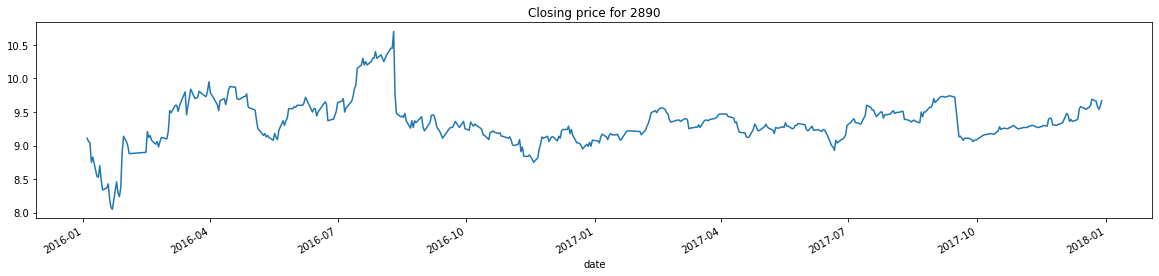

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
stock_data = stock_data[['close']].loc['2016-01-01':'2017-12-31'].dropna()
stock_data.plot(title=f"Closing price for {stock_no}", figsize=(20,4), legend=None)

In [ ]:
stock_data_train = stock_data[:stock_data.size-30]
stock_data_test = stock_data[stock_data.size-30:stock_data.size]

# Predicting closing price with ARIMA

In [ ]:
!pip -q uninstall statsmodels -y
!pip -q install statsmodels 
!pip -q install pmdarima

     |████████████████████████████████| 9.8 MB 7.4 MB/s 
     |████████████████████████████████| 1.8 MB 28.9 MB/s 


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

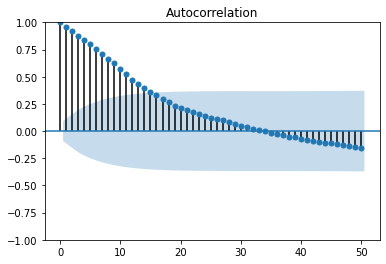

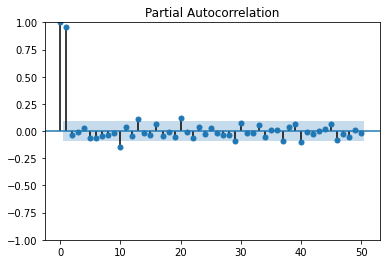

In [ ]:
acf = plot_acf(stock_data_train, lags = 50)
pacf = plot_pacf(stock_data_train, lags = 50)

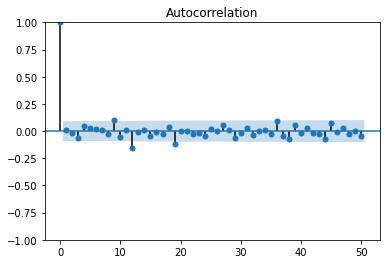

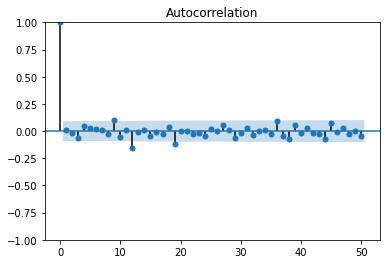

In [ ]:
stock_data_train_diff = stock_data_train.diff().dropna()
diff_acf1 = plot_acf(stock_data_train_diff, lags = 50)
diff_pacf1 = plot_acf(stock_data_train_diff, lags = 50)

**Please Determine the order of ARIMA**

In [ ]:
ARMA_model = ARIMA(stock_data_train, order=[6,0,6]) #Please find the best order of ARIMA
ARMA_model_fit = ARMA_model.fit()
print(ARMA_model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  460
Model:                 ARIMA(6, 0, 6)   Log Likelihood                 427.078
Date:                Thu, 13 Oct 2022   AIC                           -826.155
Time:                        06:49:21   BIC                           -768.318
Sample:                             0   HQIC                          -803.380
                                - 460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3393      0.092    101.257      0.000       9.159       9.520
ar.L1          0.8044      0.242      3.328      0.001       0.331       1.278
ar.L2          0.3861      0.207      1.866      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


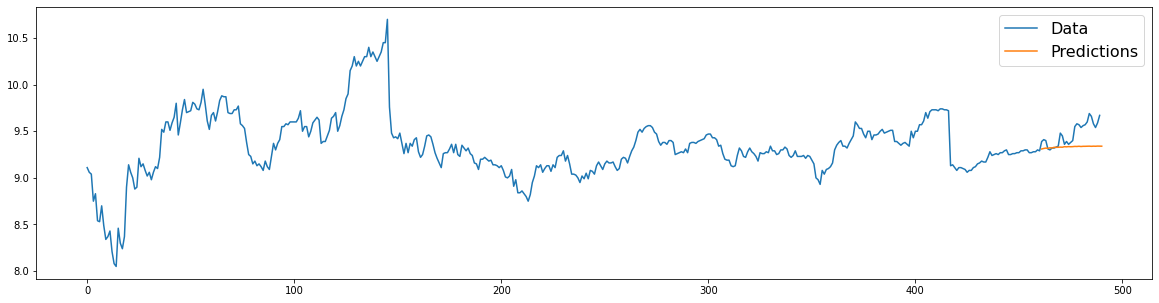

In [ ]:
pred_start = stock_data.size - 29
pred_end = stock_data.size
ARMA_predictions = ARMA_model_fit.predict(start=pred_start, end=pred_end)
plt.figure(figsize=(20,5))
plt.plot(stock_data['close'].values)
plt.plot(ARMA_predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)

In [ ]:
ARMA_pred_mse = mean_squared_error(stock_data_test.values, ARMA_predictions)
ARMA_pred_rmse= np.sqrt(ARMA_pred_mse)
print("ARMA MSE  : ", ARMA_pred_mse)
print('ARMA RMSE : ', ARMA_pred_rmse)

ARMA MSE  :  0.031085989215355377
ARMA RMSE :  0.17631219247503951


# Predicting closing price with Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
SVR_stock_data = stock_data.reset_index(drop=True)
train_data = SVR_stock_data.iloc[:449].values.flatten()
test_data = SVR_stock_data.iloc[449:].values.flatten()

def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size)]
        x.append(window)
        y.append(dataset[i+seq_size])
        
    return np.array(x),np.array(y)

seq_size = 10
trainX, trainY = to_sequences(train_data, seq_size)
testX, testY = to_sequences(test_data, seq_size)
print(trainX.shape, testX.shape)

(438, 10) (30, 10)


**Please determine the best kernel and regularization term**

In [ ]:
#SVR
svr_rbf = SVR(kernel='rbf', C=1000) #Please determine the best kernel and regularization term
svr_rbf.fit(trainX, trainY)
svr_rbf_confidence = svr_rbf.score(testX, testY)
print('svr_rbf accuracy (Confidence): ' , svr_rbf_confidence)

trainPredict = svr_rbf.predict(trainX)
testPredict = svr_rbf.predict(testX)

svr_rbf accuracy (Confidence):  0.7607435946420018


In [ ]:
#Training MSE
train_pred_mse = mean_squared_error(trainY, trainPredict)
print("train pred MSE  : ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE : ", train_pred_rmse)

print("------------------------------------------")
#Testing MSE
SVR_pred_mse = mean_squared_error(testY, testPredict)
print("test pred MSE   : ", SVR_pred_mse)
#Testing RMSE
SVR_pred_rmse = np.sqrt(SVR_pred_mse)
print("test pred RMSE  : ", SVR_pred_rmse)

train pred MSE  :  0.005299221248113068
train pred RMSE :  0.07279575020640332
------------------------------------------
test pred MSE   :  0.0034363599980218027
test pred RMSE  :  0.05862047422208219


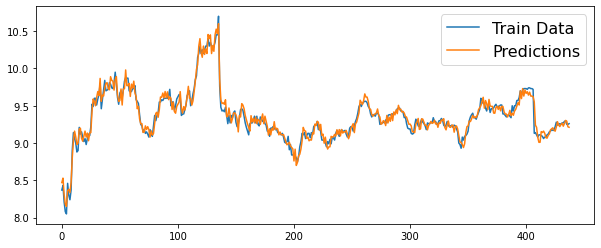

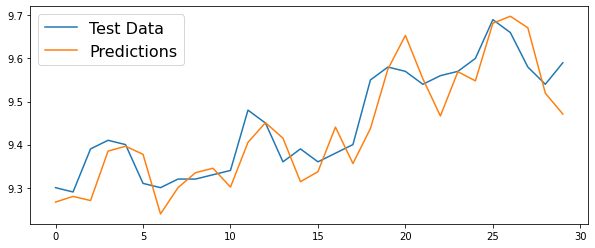

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(trainY)
plt.plot(trainPredict)
plt.legend(('Train Data', 'Predictions'), fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(testY)
plt.plot(testPredict)
plt.legend(('Test Data', 'Predictions'), fontsize=16)

# Predicting closing price with Simple NN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
NN_stock_data = stock_data.reset_index(drop=True)

data_df = pd.DataFrame(NN_stock_data)
scaler = MinMaxScaler()
scaler.fit(data_df)
NN_stock_data = scaler.transform(NN_stock_data)

train_data = NN_stock_data[:449]
test_data = NN_stock_data[449:]

In [ ]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

seq_size = 20
#Train and Test data
trainX, trainY = to_sequences(train_data, seq_size)
testX, testY = to_sequences(test_data, seq_size)

**Please design a good model to predice the closing price**

In [ ]:
model_stock = Sequential()
model_stock.add(Dense(64, input_dim=seq_size, activation='relu')) 
model_stock.add(Dense(32, activation='relu'))  
model_stock.add(Dense(1))
model_stock.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
print(model_stock.summary())
model_stock.fit(trainX, trainY, validation_split=0.1, verbose=1, epochs=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
13/13 [==============================] - 1s 19ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3/20
13/13 [==============================] - 

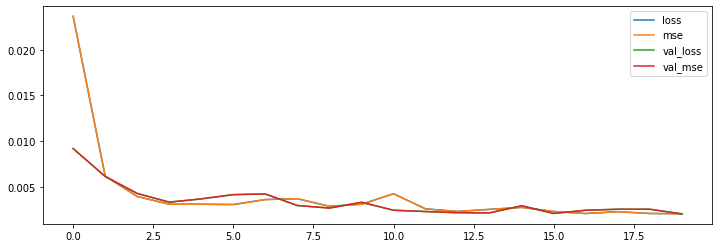

In [ ]:
losses = pd.DataFrame(model_stock.history.history)
losses.plot(figsize=(12,4))

In [ ]:
# make predictions
trainPredict = model_stock.predict(trainX)
testPredict = model_stock.predict(testX)

# Estimate model performance
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

#Training MSE
train_pred_mse = mean_squared_error(trainY_inverse[0], trainPredict[:,0])
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

#Testing MSE
NN_pred_mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
print("test pred MSE: ", NN_pred_mse)
#Testing RMSE
NN_pred_rmse = np.sqrt(NN_pred_mse)
print("test pred RMSE: ", NN_pred_rmse)

1/1 [==============================] - 0s 19ms/step
train pred MSE:  0.01418380612713189
train pred RMSE:  0.11909578551372794
test pred MSE:  0.007556218461029812
test pred RMSE:  0.08692651184207159


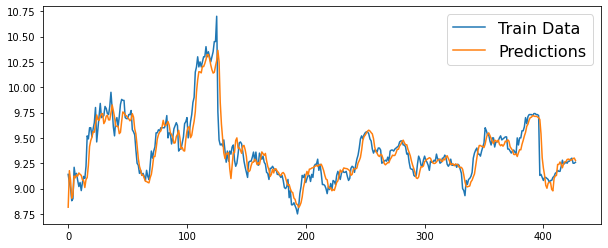

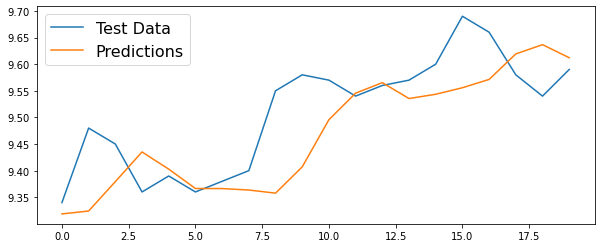

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))
plt.plot(trainY_inverse[0])
plt.plot(trainPredict[:,0])
plt.legend(('Train Data', 'Predictions'), fontsize=16)

#Plot Data and Predictions
plt.figure(figsize=(10,4))
plt.plot(testY_inverse[0])
plt.plot(testPredict[:,0])
plt.legend(('Test Data', 'Predictions'), fontsize=16)

# Predicting closing price with RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
NN_stock_data = stock_data.reset_index(drop=True)

data_df = pd.DataFrame(NN_stock_data)
scaler = MinMaxScaler()
scaler.fit(data_df)
NN_stock_data = scaler.transform(NN_stock_data)

train_data = NN_stock_data[:449]
test_data = NN_stock_data[449:]

In [ ]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

seq_size = 20
#Train and Test data
trainX, trainY = to_sequences(train_data, seq_size)
testX, testY = to_sequences(test_data, seq_size)
trainX = np.reshape(trainX, (-1, seq_size, 1))
testX = np.reshape(testX, (-1, seq_size, 1))

**Please design a good model to predict the closing price**

In [ ]:
model_stock = Sequential()
model_stock.add(SimpleRNN(units=30, input_shape=(trainX.shape[1], 1)))  
model_stock.add(Dense(1))
model_stock.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
print(model_stock.summary())
model_stock.fit(trainX, trainY, validation_split=0.1,
          verbose=1, epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
13/13 [==============================] - 1s 26ms/step - loss: 0.1053 - mse: 0.1053 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 4/100
13/13 [==============================] - 

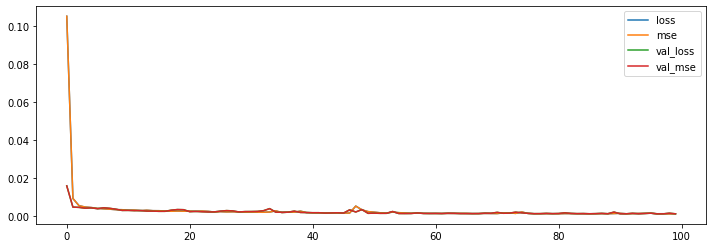

In [ ]:
losses = pd.DataFrame(model_stock.history.history)
losses.plot(figsize=(12,4))

In [ ]:
# make predictions
trainPredict = model_stock.predict(trainX)
testPredict = model_stock.predict(testX)

# Estimate model performance
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

#Training MSE
train_pred_mse = mean_squared_error(trainY_inverse[0], trainPredict[:,0])
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

#Testing MSE
RNN_pred_mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
print("test pred MSE: ", RNN_pred_mse)
#Testing RMSE
RNN_pred_rmse = np.sqrt(RNN_pred_mse)
print("test pred RMSE: ", RNN_pred_rmse)

1/1 [==============================] - 0s 21ms/step
train pred MSE:  0.009087873147222425
train pred RMSE:  0.09533033697214348
test pred MSE:  0.005366690804750713
test pred RMSE:  0.07325770133406256


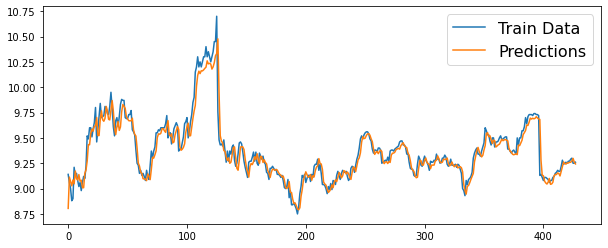

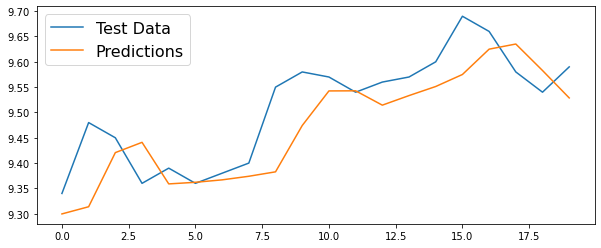

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))
plt.plot(trainY_inverse[0])
plt.plot(trainPredict[:,0])
plt.legend(('Train Data', 'Predictions'), fontsize=16)

#Plot Data and Predictions
plt.figure(figsize=(10,4))
plt.plot(testY_inverse[0])
plt.plot(testPredict[:,0])
plt.legend(('Test Data', 'Predictions'), fontsize=16)

# Predicting closing price with LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
NN_stock_data = stock_data.reset_index(drop=True)

data_df = pd.DataFrame(NN_stock_data)
scaler = MinMaxScaler()
scaler.fit(data_df)
NN_stock_data = scaler.transform(NN_stock_data)

train_data = NN_stock_data[:449]
test_data = NN_stock_data[449:]

In [ ]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

seq_size = 20
#Train and Test data
trainX, trainY = to_sequences(train_data, seq_size)
testX, testY = to_sequences(test_data, seq_size)
trainX = np.reshape(trainX, (-1, seq_size, 1))
testX = np.reshape(testX, (-1, seq_size, 1))

**Please design a good model to predict the closing price**

In [ ]:
model_stock = Sequential()
model_stock.add(LSTM(units=30, input_shape=(trainX.shape[1], 1)))  
model_stock.add(Dense(1))
model_stock.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
print(model_stock.summary())
model_stock.fit(trainX, trainY, validation_split=0.1,
          verbose=1, epochs=100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                3840      
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
13/13 [==============================] - 3s 60ms/step - loss: 0.0826 - mse: 0.0826 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 3/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4/100
13/13 [============================

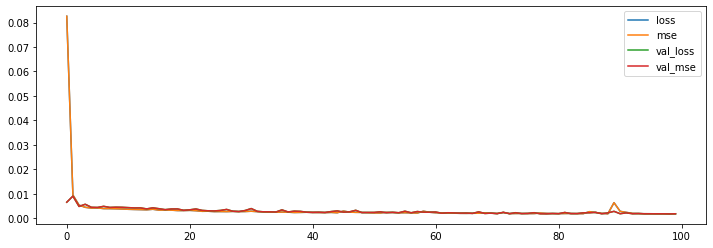

In [ ]:
losses = pd.DataFrame(model_stock.history.history)
losses.plot(figsize=(12,4))

In [ ]:
# make predictions
trainPredict = model_stock.predict(trainX)
testPredict = model_stock.predict(testX)

# Estimate model performance
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

#Training MSE
train_pred_mse = mean_squared_error(trainY_inverse[0], trainPredict[:,0])
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

#Testing MSE
LSTM_pred_mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
print("test pred MSE: ", LSTM_pred_mse)
#Testing RMSE
LSTM_pred_rmse = np.sqrt(LSTM_pred_mse)
print("test pred RMSE: ", LSTM_pred_rmse)

1/1 [==============================] - 0s 24ms/step
train pred MSE:  0.012696446461262003
train pred RMSE:  0.11267850931416337
test pred MSE:  0.004893744200844542
test pred RMSE:  0.06995530144917211


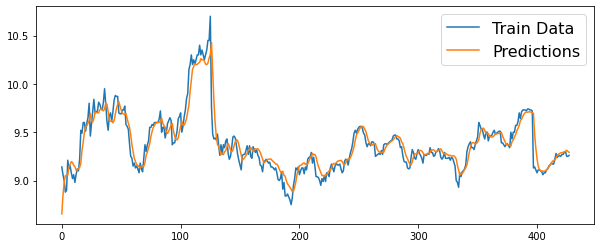

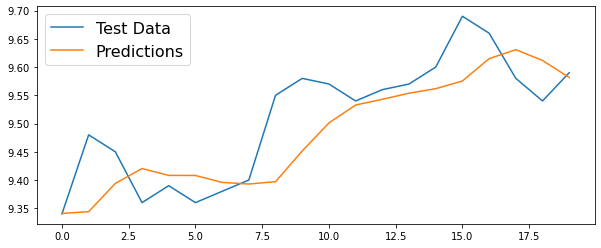

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))
plt.plot(trainY_inverse[0])
plt.plot(trainPredict[:,0])
plt.legend(('Train Data', 'Predictions'), fontsize=16)

#Plot Data and Predictions
plt.figure(figsize=(10,4))
plt.plot(testY_inverse[0])
plt.plot(testPredict[:,0])
plt.legend(('Test Data', 'Predictions'), fontsize=16)

# Predicting closing price with GRU

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
NN_stock_data = stock_data.reset_index(drop=True)

data_df = pd.DataFrame(NN_stock_data)
scaler = MinMaxScaler()
scaler.fit(data_df)
NN_stock_data = scaler.transform(NN_stock_data)

train_data = NN_stock_data[:449]
test_data = NN_stock_data[449:]

In [ ]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

seq_size = 20
#Train and Test data
trainX, trainY = to_sequences(train_data, seq_size)
testX, testY = to_sequences(test_data, seq_size)
trainX = np.reshape(trainX, (-1, seq_size, 1))
testX = np.reshape(testX, (-1, seq_size, 1))

**Please design a good model to predict the closing price**

In [ ]:
model_stock = Sequential()
model_stock.add(GRU(units=30, input_shape=(trainX.shape[1], 1)))  
model_stock.add(Dense(1))
model_stock.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
print(model_stock.summary())
model_stock.fit(trainX, trainY, validation_split=0.1,
          verbose=1, epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30)                2970      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
13/13 [==============================] - 3s 57ms/step - loss: 0.1824 - mse: 0.1824 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 2/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 3/100
13/13 [==============================] - 0s 14ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 4/100
13/13 [============================

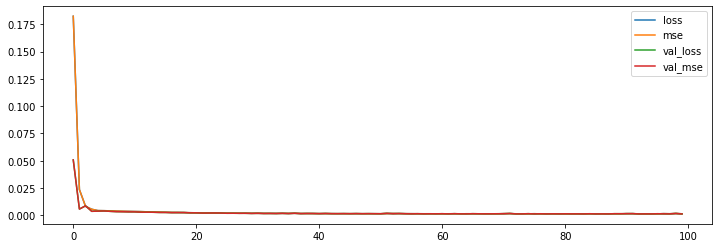

In [ ]:
losses = pd.DataFrame(model_stock.history.history)
losses.plot(figsize=(12,4))

In [ ]:
# make predictions
trainPredict = model_stock.predict(trainX)
testPredict = model_stock.predict(testX)

# Estimate model performance
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

#Training MSE
train_pred_mse = mean_squared_error(trainY_inverse[0], trainPredict[:,0])
print("train pred MSE: ", train_pred_mse)
#Training RMSE
train_pred_rmse = np.sqrt(train_pred_mse)
print("train pred RMSE: ", train_pred_rmse)

#Testing MSE
GRU_pred_mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
print("test pred MSE: ", GRU_pred_mse)
#Testing RMSE
GRU_pred_rmse = np.sqrt(GRU_pred_mse)
print("test pred RMSE: ", GRU_pred_rmse)

1/1 [==============================] - 0s 19ms/step
train pred MSE:  0.008892176205629614
train pred RMSE:  0.09429833617635898
test pred MSE:  0.004191999843453184
test pred RMSE:  0.06474565501601774


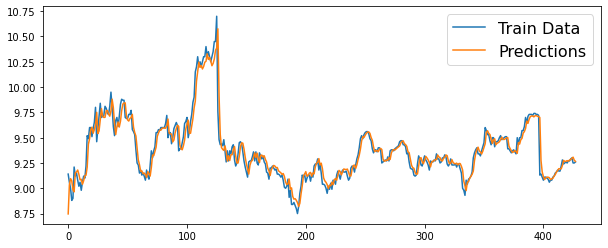

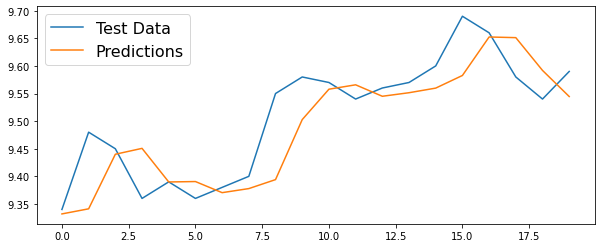

In [ ]:
#Plot Training Data and Predictions
plt.figure(figsize=(10,4))
plt.plot(trainY_inverse[0])
plt.plot(trainPredict[:,0])
plt.legend(('Train Data', 'Predictions'), fontsize=16)

#Plot Data and Predictions
plt.figure(figsize=(10,4))
plt.plot(testY_inverse[0])
plt.plot(testPredict[:,0])
plt.legend(('Test Data', 'Predictions'), fontsize=16)

# (Optional) Try to predict other stock closing price (Advanced topic)

# Final Result Comparison

In [ ]:
print("ARMA mse: ", ARMA_pred_mse)
print("ARMA rmse: ", ARMA_pred_rmse)
print("==============================")
print("SVR mse: ", SVR_pred_mse)
print("SVR rmse: ", SVR_pred_rmse)
print("==============================")
print("NN mse: ", NN_pred_mse)
print("NN rmse: ", NN_pred_rmse)
print("==============================")
print("RNN mse: ", RNN_pred_mse)
print("RNN rmse: ", RNN_pred_rmse)
print("==============================")
print("LSTM mse: ", LSTM_pred_mse)
print("LSTM rmse: ", LSTM_pred_rmse)
print("==============================")
print("GRU mse: ", GRU_pred_mse)
print("GRU rmse: ", GRU_pred_rmse)
best_model = []
best_performance = min(ARMA_pred_rmse, SVR_pred_rmse, RNN_pred_rmse, LSTM_pred_rmse, GRU_pred_rmse)
if ARMA_pred_rmse == best_performance:
  best_model.append("ARMA")
if SVR_pred_rmse == best_performance:
  best_model.append("SVR")
if NN_pred_rmse == best_performance:
  best_model.append("NN")
if RNN_pred_rmse == best_performance:
  best_model.append("RNN")
if LSTM_pred_rmse == best_performance:
  best_model.append("LSTM")
if GRU_pred_rmse == best_performance:
  best_model.append("GRU")
print("==============================")
print("The best model is", best_model)

ARMA mse:  0.031085989215355377
ARMA rmse:  0.17631219247503951
SVR mse:  0.0034363599980218027
SVR rmse:  0.05862047422208219
NN mse:  0.007556218461029812
NN rmse:  0.08692651184207159
RNN mse:  0.005366690804750713
RNN rmse:  0.07325770133406256
LSTM mse:  0.004893744200844542
LSTM rmse:  0.06995530144917211
GRU mse:  0.004191999843453184
GRU rmse:  0.06474565501601774
The best model is ['SVR']
